In [21]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Input, Dropout
from keras.utils import to_categorical
from keras import initializers
# for combining all the hyper-parameters
import itertools

In [6]:
#Extracting the training and test sets
train_df = pd.read_csv('../data/monks-1-train.csv').to_numpy()
test_df = pd.read_csv('../data/monks-1-test.csv').to_numpy()

#Preparing train_df for training
train_dataset = train_df[:, 1:7]
train_labelset = train_df[:, 0]
#Preparing test_df for testing
test_dataset = test_df[:, 1:7]
test_labelset = test_df[:, 0]

In [7]:
# one hot encoding 
def fix_zero(dataset):
  return dataset - 1

def to_one_hot_encoding(dataset):
    fixed_dataset = fix_zero(dataset)
    one_hot_dataset = []
    for column in fixed_dataset.T:
        one_hot_column = to_categorical(column)
        for column_index in range(one_hot_column.shape[1]):
            one_hot_dataset.append(one_hot_column[:,column_index])
    return np.asarray(one_hot_dataset).T

one_hot_train = to_one_hot_encoding(train_dataset)
one_hot_test  = to_one_hot_encoding(test_dataset)
# one_hot_train.shape , train_labelset.shape
# one_hot_test.shape , test_labelset.shape

((431, 17), (431,))

In [8]:
# define the grid search parameters after performing screening path
space = {}
space['lr'] = [0.5,0.45,0.55]
space['momentum'] = [0.6,0.7,0.8]
space['num_hidden_units_1'] = [5,6,7]
space['activation_hidden_1'] = ['relu','softmax','tanh','sigmoid']
space['epochs'] = [50 ,90,100,150] 

In [14]:

# All combination of the hyper-paramers
gridParameters=[space['lr'],space['epochs'],space['momentum'],space['num_hidden_units_1'],space['activation_hidden_1']]
allcombination = list(itertools.product(*gridParameters))


Best: 1.000000 using {'activation_hidden_1': 'softmax', 'epochs': 90, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 6}

In [19]:
model = Sequential()
initializer = initializers.GlorotNormal(seed=52) # seed to produce the same random sample.
model.add(Dense(units=6, kernel_initializer=initializer, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr= 0.5, momentum=0.7, nesterov=True)
model.compile(optimizer=sgd, loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(one_hot_train, train_labelset,validation_data=(one_hot_test, test_labelset), epochs=90, batch_size=10, verbose=1)

Epoch 1/90
13/13 [==============================] - 0s 14ms/step - loss: 0.2325 - accuracy: 0.6423 - val_loss: 0.2437 - val_accuracy: 0.5336
Epoch 2/90
13/13 [==============================] - 0s 6ms/step - loss: 0.1891 - accuracy: 0.6911 - val_loss: 0.2490 - val_accuracy: 0.6172
Epoch 3/90
13/13 [==============================] - 0s 5ms/step - loss: 0.1551 - accuracy: 0.7642 - val_loss: 0.1598 - val_accuracy: 0.7865
Epoch 4/90
13/13 [==============================] - 0s 5ms/step - loss: 0.1217 - accuracy: 0.8374 - val_loss: 0.1288 - val_accuracy: 0.8886
Epoch 5/90
13/13 [==============================] - 0s 5ms/step - loss: 0.0913 - accuracy: 0.9431 - val_loss: 0.1161 - val_accuracy: 0.8701
Epoch 6/90
13/13 [==============================] - 0s 5ms/step - loss: 0.0763 - accuracy: 0.9350 - val_loss: 0.0931 - val_accuracy: 0.8910
Epoch 7/90
13/13 [==============================] - 0s 6ms/step - loss: 0.0444 - accuracy: 0.9919 - val_loss: 0.0541 - val_accuracy: 0.9490
Epoch 8/90
13/13 [=

Epoch 58/90
13/13 [==============================] - 0s 7ms/step - loss: 2.7973e-04 - accuracy: 1.0000 - val_loss: 5.5982e-04 - val_accuracy: 1.0000
Epoch 59/90
13/13 [==============================] - 0s 6ms/step - loss: 2.7269e-04 - accuracy: 1.0000 - val_loss: 5.5121e-04 - val_accuracy: 1.0000
Epoch 60/90
13/13 [==============================] - 0s 6ms/step - loss: 2.6646e-04 - accuracy: 1.0000 - val_loss: 5.3474e-04 - val_accuracy: 1.0000
Epoch 61/90
13/13 [==============================] - 0s 7ms/step - loss: 2.6041e-04 - accuracy: 1.0000 - val_loss: 5.2141e-04 - val_accuracy: 1.0000
Epoch 62/90
13/13 [==============================] - 0s 5ms/step - loss: 2.5458e-04 - accuracy: 1.0000 - val_loss: 5.0998e-04 - val_accuracy: 1.0000
Epoch 63/90
13/13 [==============================] - 0s 5ms/step - loss: 2.4957e-04 - accuracy: 1.0000 - val_loss: 4.9832e-04 - val_accuracy: 1.0000
Epoch 64/90
13/13 [==============================] - 0s 6ms/step - loss: 2.4394e-04 - accuracy: 1.0000 - v

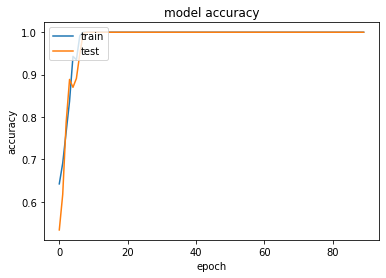

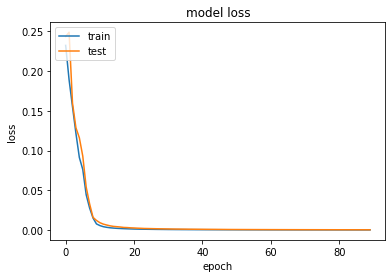

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()